In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\User\AppData\Roaming\Python\Python37\site-pack

'following link may be helpful\n \nhttps://medium.com/@hanify/sequential-api-vs-functional-api-model-in-keras-266823d7cd5e#:~:text=Sequential%20and%20Functional%20are%20two,can%20do%20that%20for%20us.\n'

In [2]:
# Organize data into train, valid, test dirs
os.chdir('dogs-vs-cats')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')

    for i in random.sample(glob.glob('train/cat*'), 500):
        shutil.move(i, 'train/cat')      
    for i in random.sample(glob.glob('train/dog*'), 500):
        shutil.move(i, 'train/dog')
    for i in random.sample(glob.glob('train/cat*'), 100):
        shutil.move(i, 'valid/cat')        
    for i in random.sample(glob.glob('train/dog*'), 100):
        shutil.move(i, 'valid/dog')
    for i in random.sample(glob.glob('train/cat*'), 50):
        shutil.move(i, 'test/cat')      
    for i in random.sample(glob.glob('train/dog*'), 50):
        shutil.move(i, 'test/dog')

os.chdir('../../')

In [3]:
#initialize the paths for the further purposes
train_path = '.../train'
valid_path = '.../valid'
test_path = '.../test'

In [4]:
"""here data are formed in the manner that fits to vgg16 model and size of one photo is set in shape of 224*224 pixels"""
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)   
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False)
#for the test batch we donot do shuffle to check as it is taken from fresh data we collected

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [5]:
#to generate a batch of images and labels from the training set
imgs, labels = next(train_batches)#getting the first the 10 batch in the list

In [6]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

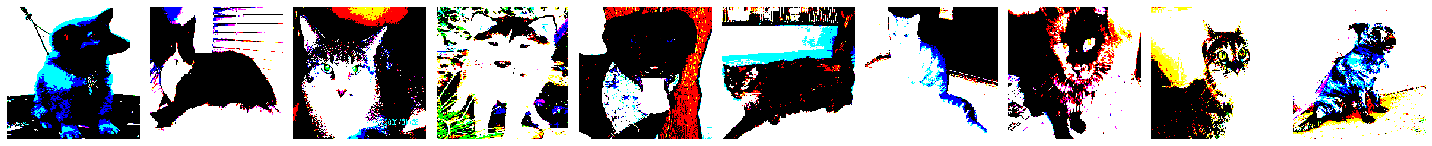

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [7]:
plotImages(imgs)#calling to the function 
print(labels)
#this is how the pictures are shown when use vgg16

In [8]:
"""here we going to train the the train_dataset that we created"""

'here we going to train the the train_dataset that we created'

In [9]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [11]:
"""here it can be seen that we have to train all the parameters in every layer so in transfer learning what we do is 
   we freeze the layers that we donot want to train and what we want to train are donot make to freeze
   -----------------------------------------------------------------------------------------------------------------
   here in the last layer what we can see is that it is a softmax layer which predict for 1000 different classes and 
   here what we want is two classes
   -----------------------------------------------------------------------------------------------------------------
   so we can freeze all the above layers without last layer and we have to create the last layer for softmax with 
   two neurons"""

'here it can be seen that we have to train all the parameters in every layer so in transfer learning what we do is \n   we freeze the layers that we donot want to train and what we want to train are donot make to freeze\n   -----------------------------------------------------------------------------------------------------------------\n   here in the last layer what we can see is that it is a softmax layer which predict for 1000 different classes and \n   here what we want is two classes\n   -----------------------------------------------------------------------------------------------------------------\n   so we can freeze all the above layers without last layer and we have to create the last layer for softmax with \n   two neurons'

In [12]:
type(vgg16_model)#this model has been gone to keras api

tensorflow.python.keras.engine.training.Model

In [13]:
model = Sequential()#here we use sequential models not functional models
for layer in vgg16_model.layers[:-1]:
    model.add(layer)
#last layer is not added to our sequential model    

In [14]:
#what here doing is freezing ---- all the layers get freezed means we use their weights for our model
for layer in model.layers:
    layer.trainable = False

In [15]:
#here we add the last layer which is a softmax with two neurons as we predict for only two classes
model.add(Dense(units=2, activation='softmax'))#this is how we add layer to the defined model

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [16]:
"""here it can be seen that the last layer is softmax layer which can predict for two classes and there are lot more 
   parameters which are not trainable and have to train only several parameters only"""

'here it can be seen that the last layer is softmax layer which can predict for two classes and there are lot more \n   parameters which are not trainable and have to train only several parameters only'

In [17]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
#here we use adam optimizer and categorical as the loss function and accuracy as the parameter to see the training 

In [18]:
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=5,
          verbose=2
)

Epoch 1/5
100/100 - 346s - loss: 0.3792 - acc: 0.8370 - val_loss: 0.1324 - val_acc: 0.9450
Epoch 2/5
100/100 - 301s - loss: 0.0872 - acc: 0.9710 - val_loss: 0.0855 - val_acc: 0.9600
Epoch 3/5
100/100 - 296s - loss: 0.0573 - acc: 0.9800 - val_loss: 0.0706 - val_acc: 0.9650
Epoch 4/5
100/100 - 339s - loss: 0.0417 - acc: 0.9860 - val_loss: 0.0592 - val_acc: 0.9800
Epoch 5/5
100/100 - 320s - loss: 0.0322 - acc: 0.9890 - val_loss: 0.0567 - val_acc: 0.9800


In [41]:
#checks first to see if the file exits already
#if not the model is saved to disk
from os import path
if os.path.isfile('... .h5') is False:
    model.save('... .h5')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

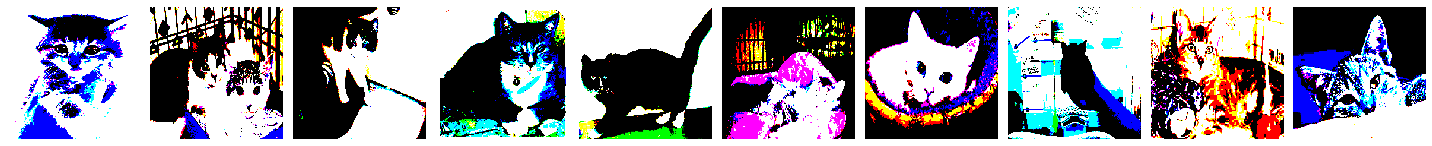

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [29]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)
#get the next batch and print it's labels

In [36]:
#predict for the test batches and no need to print any thing
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=2)

10/10 - 24s


In [37]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[48  2]
 [ 3 47]]


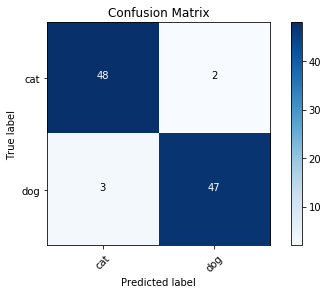

In [38]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')